# Summary Exercises - SOLUTIONS

We've introduced a number of different concepts at this point. Let me try and set some summary exercises to close things out, these will probably be quite challenging. 

## Exercise 1

Write a generator with the following properties:

* The generator should model the motion of a particle in two directions (call them x and y).
* The initial position of the particle should be (0,0) (corresponding to the positions in x and y). This should be the first `yield` of this generator.
* Every subsequent `yield` should move the particle by a random amount in x and y. The magnitude moved should be drawn from a uniform distribution between 0 and 1 and the direction of this moving should be drawn from a uniform angle between 0 and 2pi.
* The generator should stop when the distance between the particle and the origin is at least 10.

Run this generator (use a list comprehension to run the generator and store the x,y positions of the particle over time).

Plot these positions in a 2D plot.

Run the generator some additional times and show these evolutions on the same plot.


In [1]:
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(15)

def move_particle():
    position = (0,0)
    origin_distance = 0
    while origin_distance < 10:
        yield position
        movement_magnitude = np.random.uniform(0,1)
        movement_angle = np.random.uniform(0, 2*np.pi)
        position = (position[0] + movement_magnitude*np.cos(movement_angle), position[1] + movement_magnitude*np.sin(movement_angle))
        origin_distance = np.sqrt(position[0]**2 + position[1]**2)

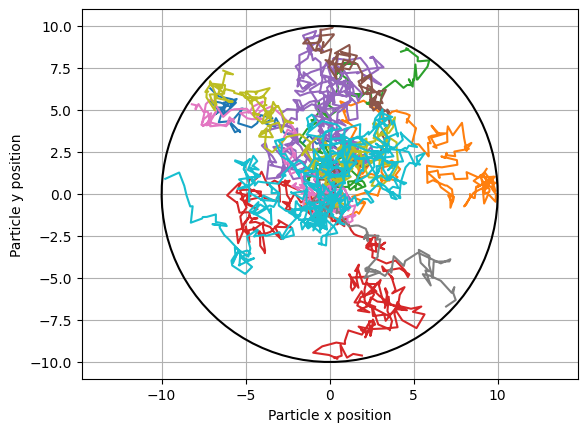

In [2]:
for _ in range(10):
    x, y = zip(*list(move_particle()))
    plt.plot(x, y)

# Plot a 10 unit circle
circ_theta = np.linspace(0, 2*np.pi, 100)
circ_x = np.sin(circ_theta) * 10
circ_y = np.cos(circ_theta) * 10
plt.plot(circ_x, circ_y, 'k')
# set the axes to be equal, to that this looks nice and circular
plt.gca().axis('equal')
# Add labels
plt.xlabel('Particle x position')
plt.ylabel('Particle y position')
plt.grid()

## Exercise 2

(Courtesy of codesignal.com, https://app.codesignal.com/arcade/python-arcade/lambda-illusions/eP7hJDmLdZym2Kdo3)

"""
You've been preparing all night for the upcoming test and entered the class certain that you will ace it. Now that you received the test questions, you died inside a little: looks like you prepared for the test on a completely different topic.

You're not even sure if you should bother to answer the questions. You still have some hope though: it is known that there's a glitch in the test preparing system, so that if the sum of digits of question ids is divisible by k, the answer to each question has a 90% probability to be an A.

Given the list of question ids, determine if the sum of their digits is divisible by k to see if it's worth trying to pass the test.
"""

To solve this problem you must write a lambda function in the space indicated. You *must not* add any additional lines to solve this!


In [3]:
def isTestSolvable(ids, k):
    # To solve this, we convert the number n to a string,
    # then loop through the digits of the string and convert to a integer
    # then finally we take the sum of this list
    digitSum = lambda n: sum([int(d) for d in str(n)])

    sm = 0
    for questionId in ids:
        sm += digitSum(questionId)
    return sm % k == 0

ids = [529665, 909767, 644200]
k = 3
print (isTestSolvable(ids,k), "Should be True")

ids = [882144, 993441, 460418, 325830, 404529, 912233, 255818, 68407, 94032, 6801, 38227, 997782, 747063, 754688, 725338, 802267, 673468, 271162, 478014, 21599]
k = 6
print (isTestSolvable(ids,k), "Should be False")


True Should be True
False Should be False


## Exercise 3

(From https://www.w3resource.com/)

Write a Python program to calculate the value of 'a' to the power 'b'. Do not use the `**` operator, the `pow` function `math.pow`, equivalent numpy functions or anything else that already does this for you.

Assume that b is an integer, and implement this using only the multiply `*` operator. Can you write a solution:

1. Using recursion
1. Not using recursion

Which do you prefer?

In [4]:
def pow_recursive(a, b):
    # Multiply by a by a ** (b-1) until the recursion meets b = 1
    if b == 0:
        # We need to be careful in this case, b - 1 will go to negative numbers,
        # which are not supported here
        return 1
    elif b == 1:
        # a ** 1 = a - this is when we break
        return a
    elif b > 1:
        # take one off b and multiply by a
        return pow_recursive(a, b-1) * a

def pow_alternative(a, b):
    # multiply by a in a loop which is length b
    result = 1
    # set up a loop of length b - how we do it doesnt actually matter
    for _ in range(b):
        # Now multiply by a for each iteration through the loop
        result = result * a
    # Note how this solution doesnt have to handle the b = 0 case explicitly
    return result

# show that it works for various options:
for a, b in [(3,4),(0,4),(4,0),(1,44),(13,7),(313,11)]:
    print(a ** b, pow_recursive(a,b) == a ** b, pow_alternative(a,b) == a ** b)

81 True True
0 True True
1 True True
1 True True
62748517 True True
2824800055000021240134845737 True True


## EXERCISE 4

Given a string, write a function to return all unique palindromic (https://en.wikipedia.org/wiki/Palindrome) substrings (https://en.wikipedia.org/wiki/Substring) sorted according to the scrabble value of each of the substrings (if the scrabble score is equal, it should be alphabetically sorted). By this we mean if the string is "arsfgfsgh", the output should be `['a', 'r', 's', 'g', 'f', 'fgf', 'sfgfs']`. These are all the possible substrings of the input which are palindromes and they ordered in increasing values of the scrabble score (a = 1, r = 1, s = 1, g = 2, f = 4, fgf = 10, sfgfs = 12).

Some other examples and outputs:

* Input: 'cabca'; Output: `['a', 'b', 'c']`
* Input: 'ccccccccccc'; Output: `['c', 'cc', 'ccc', 'cccc', 'ccccc', 'cccccc', 'ccccccc', 'cccccccc', 'ccccccccc', 'cccccccccc']`
* Input: 'abacabaabacab'; Output: `['a', 'aa', 'b', 'c', 'aba', 'aca', 'baab', 'abaaba', 'bacab', 'abacaba', 'cabaabac', 'acabaabaca']`
* Input: 'zazazaza'; Output: `['a', 'z', 'aza', 'zaz', 'azaza', 'zazaz', 'zazazaz']`
* Input: 'shjzzovuzvabrcrfxemkhbiguanipxaxrnybexth'; Output: `['a', 'e', 'i', 'n', 'o', 'r', 's', 't', 'u', 'g', 'b', 'c', 'm', 'p', 'f', 'h', 'v', 'y', 'k', 'rcr', 'j', 'x', 'z', 'xax', 'zz']`

In [5]:
scrabble_score = {"a": 1 , "b": 3 , "c": 3 , "d": 2 ,
         "e": 1 , "f": 4 , "g": 2 , "h": 4 ,
         "i": 1 , "j": 8 , "k": 5 , "l": 1 ,
         "m": 3 , "n": 1 , "o": 1 , "p": 3 ,
         "q": 10, "r": 1 , "s": 1 , "t": 1 ,
         "u": 1 , "v": 4 , "w": 4 , "x": 8 ,
         "y": 4 , "z": 10}

# lets define a function which calculates the scrabble score of a string to make the code a bit neater later
def score(substring):
    return sum(scrabble_score[letter] for letter in substring)

# Code here
def palindromic_substrings(s):
    # First get all subsets:
    n = len(s)
    # using set() means that duplicates are handled nicely
    pals = set()
    # Loop through the index for the end of the string
    for end in range(n):
        # Loop through the index for the start of the string (this only goes up to the end index - 1)
        for start in range(end):
            potential_palindrome = s[start:end]
            # Now we test whether it is a palindrome or not
            if potential_palindrome == potential_palindrome[::-1]:
                # It is! - now lets add it to the list of palindromes
                pals.add(s[start:end])

    # sort by scrabble score then alphabetically - this is the tuple returned by lambda
    return sorted(pals, key=lambda substring: (score(substring), substring))

tests = [
    ("arsfgfsgh", ['a', 'r', 's', 'g', 'f', 'fgf', 'sfgfs']),
    ("cabca", ['a', 'b', 'c']),
    ("ccccccccccc", ['c', 'cc', 'ccc', 'cccc', 'ccccc', 'cccccc', 'ccccccc', 'cccccccc', 'ccccccccc', 'cccccccccc']),
    ("abacabaabacab", ['a', 'aa', 'b', 'c', 'aba', 'aca', 'baab', 'abaaba', 'bacab', 'abacaba', 'cabaabac', 'acabaabaca']),
    ("zazazaza", ['a', 'z', 'aza', 'zaz', 'azaza', 'zazaz', 'zazazaz']),
    ("shjzzovuzvabrcrfxemkhbiguanipxaxrnybexth", ['a','e','i','n','o','r','s','t','u','g','b','c','m','p','f','h','v','y','k','rcr','j','x','z','xax','zz'])
]

for s, expected in tests:
    result = palindromic_substrings(s)
    print(s, "->", result)
    print("Correct" if result ==  expected else "WRONG")
    print()

arsfgfsgh -> ['a', 'r', 's', 'g', 'f', 'fgf', 'sfgfs']
Correct

cabca -> ['a', 'b', 'c']
Correct

ccccccccccc -> ['c', 'cc', 'ccc', 'cccc', 'ccccc', 'cccccc', 'ccccccc', 'cccccccc', 'ccccccccc', 'cccccccccc']
Correct

abacabaabacab -> ['a', 'aa', 'b', 'c', 'aba', 'aca', 'baab', 'abaaba', 'bacab', 'abacaba', 'cabaabac', 'acabaabaca']
Correct

zazazaza -> ['a', 'z', 'aza', 'zaz', 'azaza', 'zazaz', 'zazazaz']
Correct

shjzzovuzvabrcrfxemkhbiguanipxaxrnybexth -> ['a', 'e', 'i', 'n', 'o', 'r', 's', 't', 'u', 'g', 'b', 'c', 'm', 'p', 'f', 'h', 'v', 'y', 'k', 'rcr', 'j', 'x', 'z', 'xax', 'zz']
Correct

